# Visualization

## Code

In [1]:
import sys
sys.path.insert(0, '/home/emmanuel/projects/2019_rbig_ad/src')
sys.path.append('/home/emmanuel/code/py_esdc')
sys.path.append('/home/emmanuel/code/rbig')


# DataCube PreProcessing
from scipy.io import savemat, loadmat
import geopandas as geopd
from rasterio import features

# Main Libraries
import numpy as np
import scipy.io as scio
import xarray as xr
import pandas as pd
import seaborn as sns
from datetime import date
import time

# IT Algorithms
from rbig import RBIG, RBIGMI

# ML Preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from scipy import signal

# Plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['seaborn-poster'])
import tqdm

# Utilities
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

# Notebook Specifics
%load_ext autoreload
%autoreload 2

In [2]:
plt.style.available

['seaborn-dark-palette',
 'classic',
 'ggplot',
 'seaborn-dark',
 'seaborn-pastel',
 'seaborn-bright',
 'seaborn-deep',
 'tableau-colorblind10',
 'seaborn-talk',
 'fast',
 'seaborn-ticks',
 'seaborn-white',
 'bmh',
 'fivethirtyeight',
 'seaborn-muted',
 '_classic_test',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-poster',
 'seaborn',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-paper',
 'seaborn-colorblind',
 'seaborn-notebook',
 'Solarize_Light2']

In [3]:
FIG_PATH = '/home/emmanuel/projects/2020_rbig_rs/reports/figures/drought/individual/'
DATA_PATH = '/home/emmanuel/projects/2020_rbig_rs/data/drought/results/'

datasets = [
    'exp_ind_v2.csv',
    'exp_group_v2.csv'
]

## Experiment I - Individual Variables

In [4]:
data = pd.read_csv(DATA_PATH + datasets[0], index_col=[0])
data.head()

,drought,h,samples,tc,temporal,time,variable,year
0,0.0,1.405693,25779.0,0.000000,1.0,0.551456,VOD,2010.0
1,0.0,1.311283,25779.0,0.000000,1.0,0.557524,NDVI,2010.0
2,0.0,1.141273,25779.0,0.000000,1.0,0.547523,SM,2010.0
3,0.0,1.364679,25779.0,0.000000,1.0,0.547514,LST,2010.0
4,0.0,2.680166,24108.0,0.128393,2.0,1.434613,VOD,2010.0


### Normalize

In [5]:
# normalize
data['h_norm'] = data['h'].div(data.temporal)
data['tc_norm'] = data['tc'].div(data.temporal)

### Entropy

In [54]:
def plot_entropy(data, normalized=False, save=True, drought=True):
    fig, ax = plt.subplots()
    
    if drought:
        drought = 'drought'
        data = data[data['year'].isin([2012, 2014, 2015])]
    
    elif not drought:
        drought = 'nondrought'
        data = data[data['year'].isin([2010, 2011, 2013])]
    else:
        raise ValueError('Unrecognized drought state: ', drought)
        
#     print(data.shape, data['year'].unique().tolist())
    if normalized:
        y = 'h_norm'
        
    else:
        y = 'h'
    sns.lineplot(
        x="temporal", y=y, 
        hue='variable', 
        data=data,
        marker='o', 
    )
    ax.set_xlabel('Temporal Dims')
    ax.set_ylabel('Entropy')
    # plt.legend(['NDVI', 'LST', 'SM', 'VOD'])
    plt.tight_layout()
    plt.show()
    if normalized and save:
        fig.savefig(f"{FIG_PATH}H_norm_individual_{drought}.png", frameon=False, )
    elif save:
        fig.savefig(f"{FIG_PATH}H_individual_{drought}.png", frameon=False, )
    
    

(132, 10) [2012.0, 2014.0, 2015.0]


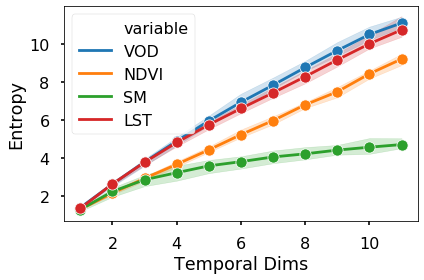

(132, 10) [2010.0, 2011.0, 2013.0]


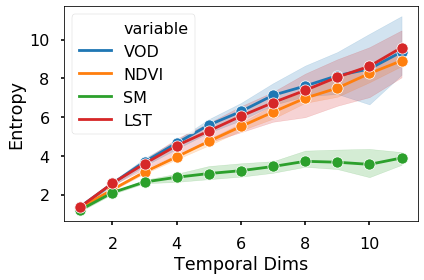

In [52]:
plot_entropy(data, normalized=False, save=False, drought=True)
plot_entropy(data, normalized=False, save=False, drought=False)

(132, 10) [2012.0, 2014.0, 2015.0]


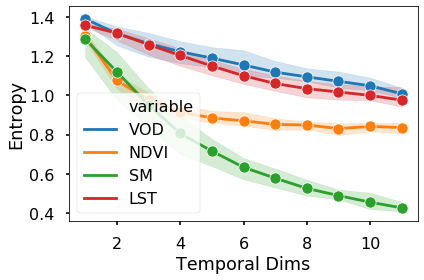

(132, 10) [2010.0, 2011.0, 2013.0]


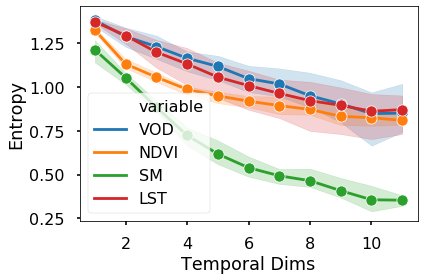

In [53]:
plot_entropy(data, normalized=True, save=False, drought=True)
plot_entropy(data, normalized=True, save=False, drought=False)

### Total Correlation

In [55]:
def plot_tc(data, normalized=False, save=True, drought=True):
    fig, ax = plt.subplots()
    
    if drought:
        drought = 'drought'
        data = data[data['year'].isin([2012, 2014, 2015])]
    
    elif not drought:
        drought = 'nondrought'
        data = data[data['year'].isin([2010, 2011, 2013])]
    else:
        raise ValueError('Unrecognized drought state: ', drought)
        
    if normalized:
        y = 'tc_norm'
        
    else:
        y = 'tc'
    sns.lineplot(
        x="temporal", y=y, 
        hue='variable', 
        data=data,
        marker='o', 
    )
    ax.set_xlabel('Temporal Dims')
    ax.set_ylabel('Total Correlation')
    # plt.legend(['NDVI', 'LST', 'SM', 'VOD'])
    plt.tight_layout()
    plt.show()
    if normalized and save:
        fig.savefig(f"{FIG_PATH}TC_norm_individual_{drought}.png", frameon=False, )
    elif save:
        fig.savefig(f"{FIG_PATH}TC_individual_{drought}.png", frameon=False, )
    

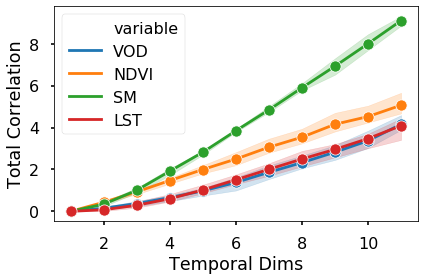

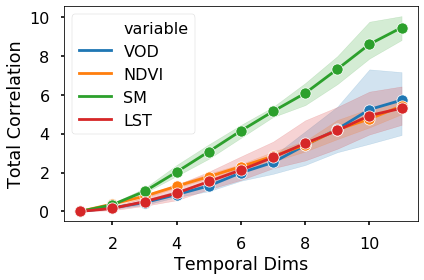

In [56]:
plot_tc(data, normalized=False, save=False, drought=True)
plot_tc(data, normalized=False, save=False, drought=False)

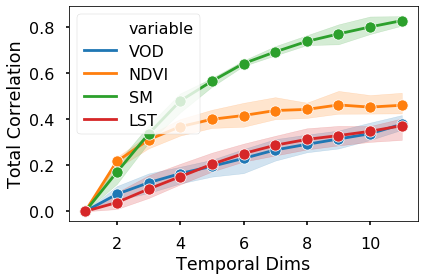

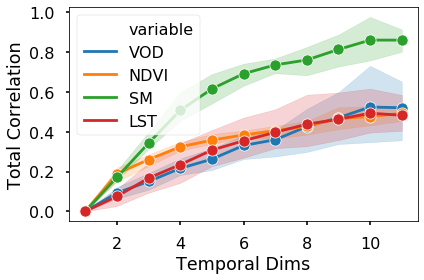

In [57]:
plot_tc(data, normalized=True, save=False, drought=True)
plot_tc(data, normalized=True, save=False, drought=False)

## Experiment II - Comparing Variables

In [19]:
data_group = pd.read_csv(DATA_PATH + datasets[1], index_col=[0])
data_group.head()

,drought,mi,pearson,samples,spearman,temporal,time,variable1,variable2,year
0,0.0,0.014735,0.064995,25779.0,0.083071,1.0,2.844188,VOD,NDVI,2010.0
1,0.0,0.024350,0.008711,25779.0,0.024544,1.0,2.887552,VOD,LST,2010.0
2,0.0,0.142746,0.150556,25779.0,0.290016,1.0,3.263144,VOD,SM,2010.0
3,0.0,0.019120,-0.107464,25779.0,-0.118719,1.0,2.836338,NDVI,LST,2010.0
4,0.0,0.059311,0.211504,25779.0,0.181002,1.0,2.830751,NDVI,SM,2010.0


### Normalize

In [58]:
# normalize
data_group['mi_norm'] = data_group['mi'].div(data_group.temporal)

In [59]:
cond1 = data_group['variable1'] == 'NDVI'
cond2 = data_group['variable2'] == 'NDVI'
data_group.loc[cond1 & cond2, ['variable1', 'variable2']] = data_group.loc[cond1 & cond2, ['variable2', 'variable1']].values

In [60]:
def move_variables(df: pd.DataFrame, variable: str)-> pd.DataFrame:
#     cond1 = df['variable1'] == variable
    cond = df['variable2'] == variable
    df.loc[
        cond, ['variable2', 'variable1']
    ] = df.loc[
        cond, ['variable1', 'variable2']
    ].values

    return df

In [61]:
df_new = move_variables(data_group, 'NDVI')

df_new.head()

,drought,mi,pearson,samples,spearman,temporal,time,variable1,variable2,year,mi_norm
0,0.0,0.014735,0.064995,25779.0,0.083071,1.0,2.844188,NDVI,VOD,2010.0,0.014735
1,0.0,0.024350,0.008711,25779.0,0.024544,1.0,2.887552,LST,VOD,2010.0,0.024350
2,0.0,0.142746,0.150556,25779.0,0.290016,1.0,3.263144,SM,VOD,2010.0,0.142746
3,0.0,0.019120,-0.107464,25779.0,-0.118719,1.0,2.836338,NDVI,LST,2010.0,0.019120
4,0.0,0.059311,0.211504,25779.0,0.181002,1.0,2.830751,NDVI,SM,2010.0,0.059311


### Mutual Information

In [62]:
def plot_mutual_info(data, normalized=False, save=True, variable='VOD', drought=True):
    fig, ax = plt.subplots()
    
    if drought:
        drought = 'drought'
        data = data[data['year'].isin([2012, 2014, 2015])]
    
    elif not drought:
        drought = 'nondrought'
        data = data[data['year'].isin([2010, 2011, 2013])]
    else:
        raise ValueError('Unrecognized drought state: ', drought)
        
    # Select variable
    data = move_variables(data, variable)
    
    data = data[data['variable1'] == variable]
#     print(data.variable2)
    if normalized:
        y = 'mi_norm'
        
    else:
        y = 'mi'
    sns.lineplot(
        x="temporal", y=y, 
        hue='variable2', 
        data=data,
        marker='o', 
    )
    ax.set_xlabel('Temporal Dims')
    ax.set_ylabel('Mutual Information')
    # plt.legend(['NDVI', 'LST', 'SM', 'VOD'])
    plt.tight_layout()
    plt.show()
    if normalized and save:
        fig.savefig(f"{FIG_PATH}MI_norm_individual_{drought}.png", frameon=False, )
    elif save:
        fig.savefig(f"{FIG_PATH}MI_individual_{drought}.png", frameon=False, )

#### VOD

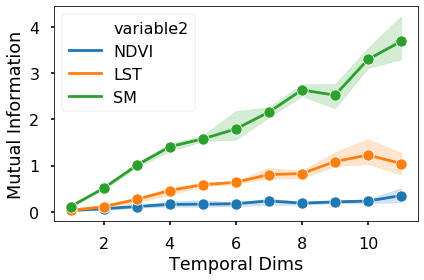

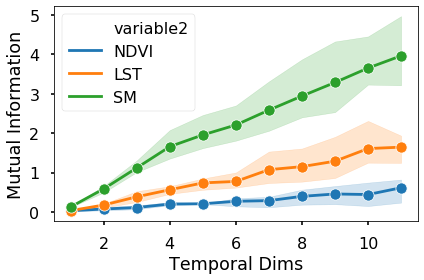

In [63]:
plot_mutual_info(data_group, normalized=False, save=True, variable='VOD', drought=True)
plot_mutual_info(data_group, normalized=False, save=True, variable='VOD', drought=False)

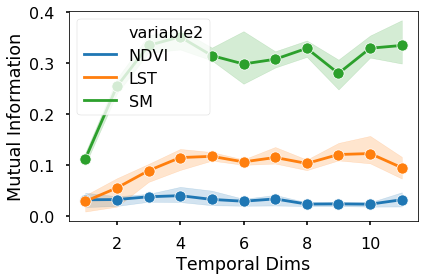

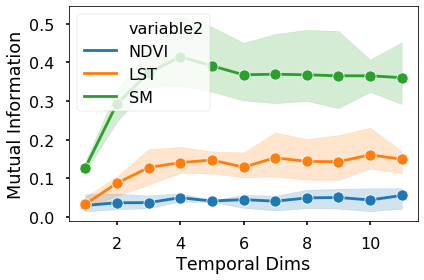

In [64]:
plot_mutual_info(data_group, normalized=True, save=True, variable='VOD', drought=True)
plot_mutual_info(data_group, normalized=True, save=True, variable='VOD', drought=False)

#### NDVI

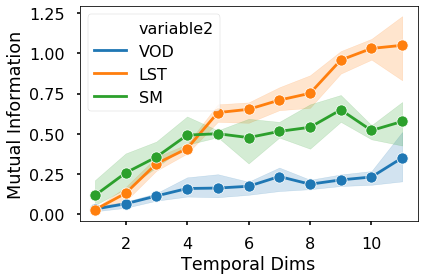

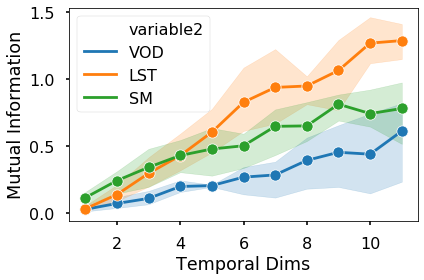

In [65]:
plot_mutual_info(data_group, normalized=False, save=True, variable='NDVI', drought=True)
plot_mutual_info(data_group, normalized=False, save=True, variable='NDVI', drought=False)

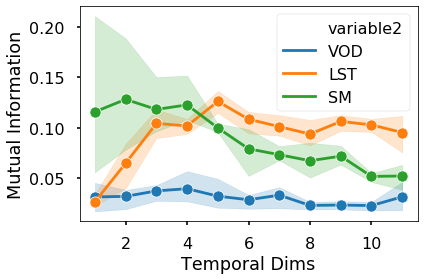

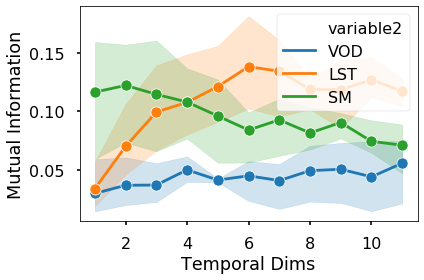

In [66]:
plot_mutual_info(data_group, normalized=True, save=True, variable='NDVI', drought=True)
plot_mutual_info(data_group, normalized=True, save=True, variable='NDVI', drought=False)

#### LST

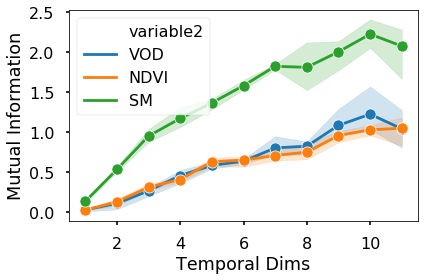

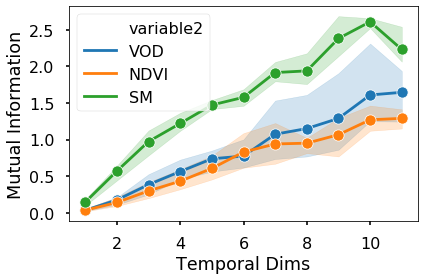

In [67]:
plot_mutual_info(data_group, normalized=False, save=True, variable='LST', drought=True)
plot_mutual_info(data_group, normalized=False, save=True, variable='LST', drought=False)

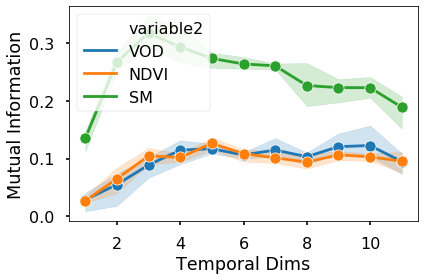

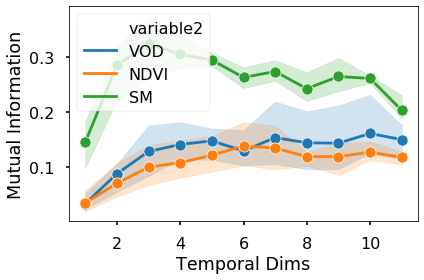

In [68]:
plot_mutual_info(data_group, normalized=True, save=True, variable='LST', drought=True)
plot_mutual_info(data_group, normalized=True, save=True, variable='LST', drought=False)

#### SM

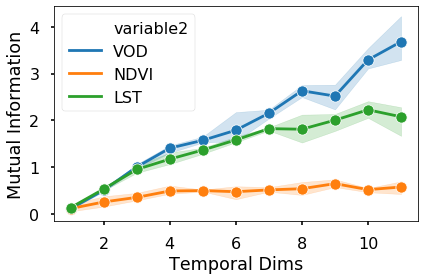

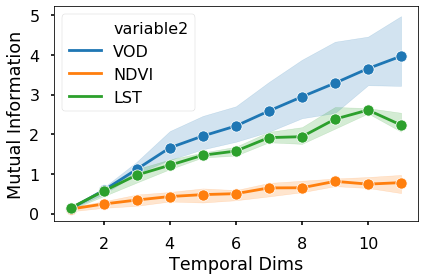

In [69]:
plot_mutual_info(data_group, normalized=False, save=True, variable='SM', drought=True)
plot_mutual_info(data_group, normalized=False, save=True, variable='SM', drought=False)

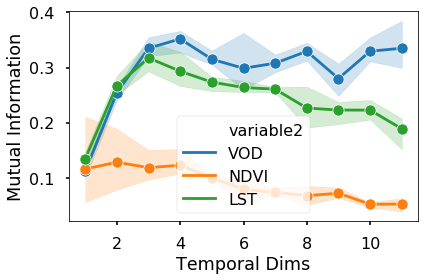

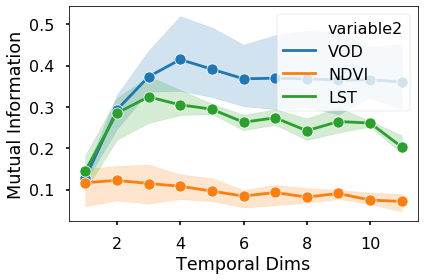

In [70]:
plot_mutual_info(data_group, normalized=True, save=True, variable='SM', drought=True)
plot_mutual_info(data_group, normalized=True, save=True, variable='SM', drought=False)